<h1>2) Face Recognition with PCA</h1>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "att_faces"
CATEGORIES =[]
training_data=[]
for i in range(1,41):
    CATEGORIES.append("s"+str(i))
    

In [27]:
from tqdm import tqdm

<h2>Load the data</h2>

In [28]:
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)+1
        for img in tqdm(os.listdir(path)):
            try:
                print(img)
                img_array = cv2.imread(os.path.join(path,img),0)
#                 print(img_array.shape)
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
                
        

In [104]:
# create_training_data()
#Definetly run this cell

<h3>Look at the data</h3>

In [44]:
training_data[0][0].shape
h,w=112,92
n_features = 92

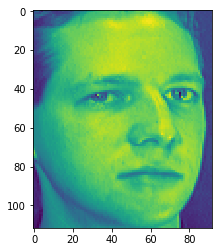

In [33]:
plt.imshow(training_data[0][0])
plt.show()

<h3>Flatten the image</h3>

In [34]:
def flatten(train):
    for i in range(len(train)):
#         print(train[i][0])
        train[i][0] = train[i][0].flatten()
#         print("Flatten",train[i][0])

In [35]:
flatten(training_data)

<h2>Standardizing the images</h2>

In [36]:
def standardize(train):
    for i in range(len(train)):
        ar = np.asarray(train[i][0])
        mean = np.mean(ar)
        std = np.std(ar)
        train[i][0] = (ar-mean)/std

In [37]:
# standardize(training_data)

In [38]:
training_data[0][0].shape

(10304,)

<h3>Create an matrix consisting of images</h3>

In [39]:
def create_image_matrix(train_data):
    images=[]
    for image in train_data:
        images.append(np.asarray(image[0]))
    return images

In [40]:
images_matrix = np.matrix(create_image_matrix(training_data))

In [45]:
images_matrix

matrix([[ 64,  76,  80, ...,  35,  37,  39],
        [ 41,  47,  47, ...,  35,  37,  38],
        [ 48,  49,  45, ...,  47,  46,  46],
        ...,
        [131, 125, 126, ...,  89,  93,  91],
        [127, 131, 128, ...,  94,  84,  89],
        [119, 120, 120, ...,  89,  94,  85]], dtype=uint8)

<h3>Before applying PCA,we need to standardize the matrix the data</h3>

In [46]:
def extract_labels():
    labels = []
    for i in training_data:
        labels.append(i[1])
    return labels

In [51]:
n_samples=400
n_classes = 10

In [52]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
Y = np.asarray(extract_labels())
X = images_matrix

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [59]:
pca = PCA(n_components=200).fit(X_train)
eigenFaces = pca.components_.reshape((200,h,w))
X_train_pca,X_test_pca=pca.transform(X_train),pca.transform(X_test)

In [83]:
X_train_pca.shape,X_test_pca.shape

((360, 200), (40, 200))

In [72]:
param_grid = {'C':range(1,5),'solver' :["newton-cg"],'max_iter':np.asarray([10000])}
clf = GridSearchCV(LogisticRegression(random_state=0,multi_class='ovr'),param_grid,cv=5)
clf = clf.fit(X_train_pca,Y_train)

In [73]:
clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
from time import time
t0=time()
y_pred = clf.predict(X_test_pca)
print("Time taken %0.3fs"%(time()-t0))
print(len(y_pred))

Time taken 0.007s
40


In [91]:
# CATEGORIES

<h3>Classfication Report:</h3>

In [89]:
print(classification_report(Y_test,y_pred,target_names=CATEGORIES))

             precision    recall  f1-score   support

         s1       1.00      1.00      1.00         2
         s2       1.00      1.00      1.00         1
         s3       0.00      0.00      0.00         0
         s4       1.00      1.00      1.00         1
         s5       1.00      1.00      1.00         2
         s6       1.00      1.00      1.00         2
         s7       1.00      1.00      1.00         1
         s8       1.00      1.00      1.00         1
         s9       1.00      1.00      1.00         1
        s10       1.00      1.00      1.00         1
        s11       1.00      1.00      1.00         2
        s12       1.00      1.00      1.00         2
        s13       1.00      1.00      1.00         1
        s14       1.00      1.00      1.00         5
        s15       1.00      1.00      1.00         2
        s16       1.00      1.00      1.00         1
        s17       1.00      1.00      1.00         1
        s18       1.00      1.00      1.00   

/home/rg/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 28, does not match size of target_names, 40
  .format(len(labels), len(target_names))
/home/rg/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rg/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


<h5>Confusion Matrix:</h5>

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
results = confusion_matrix(Y_test,y_pred)

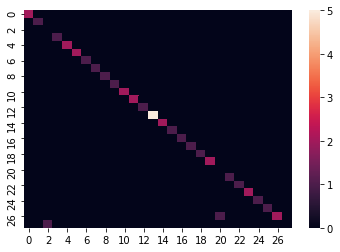

In [98]:
ax = sns.heatmap(results)
plt.show()